In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])

# Separate categorical features (object data type)
categorical_features = train_data.select_dtypes(include=['object'])

# Display the numerical and categorical features
print("Numerical Features:\n", numerical_features.head())
print("Categorical Features:\n", categorical_features.head())

Numerical Features:
    Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal

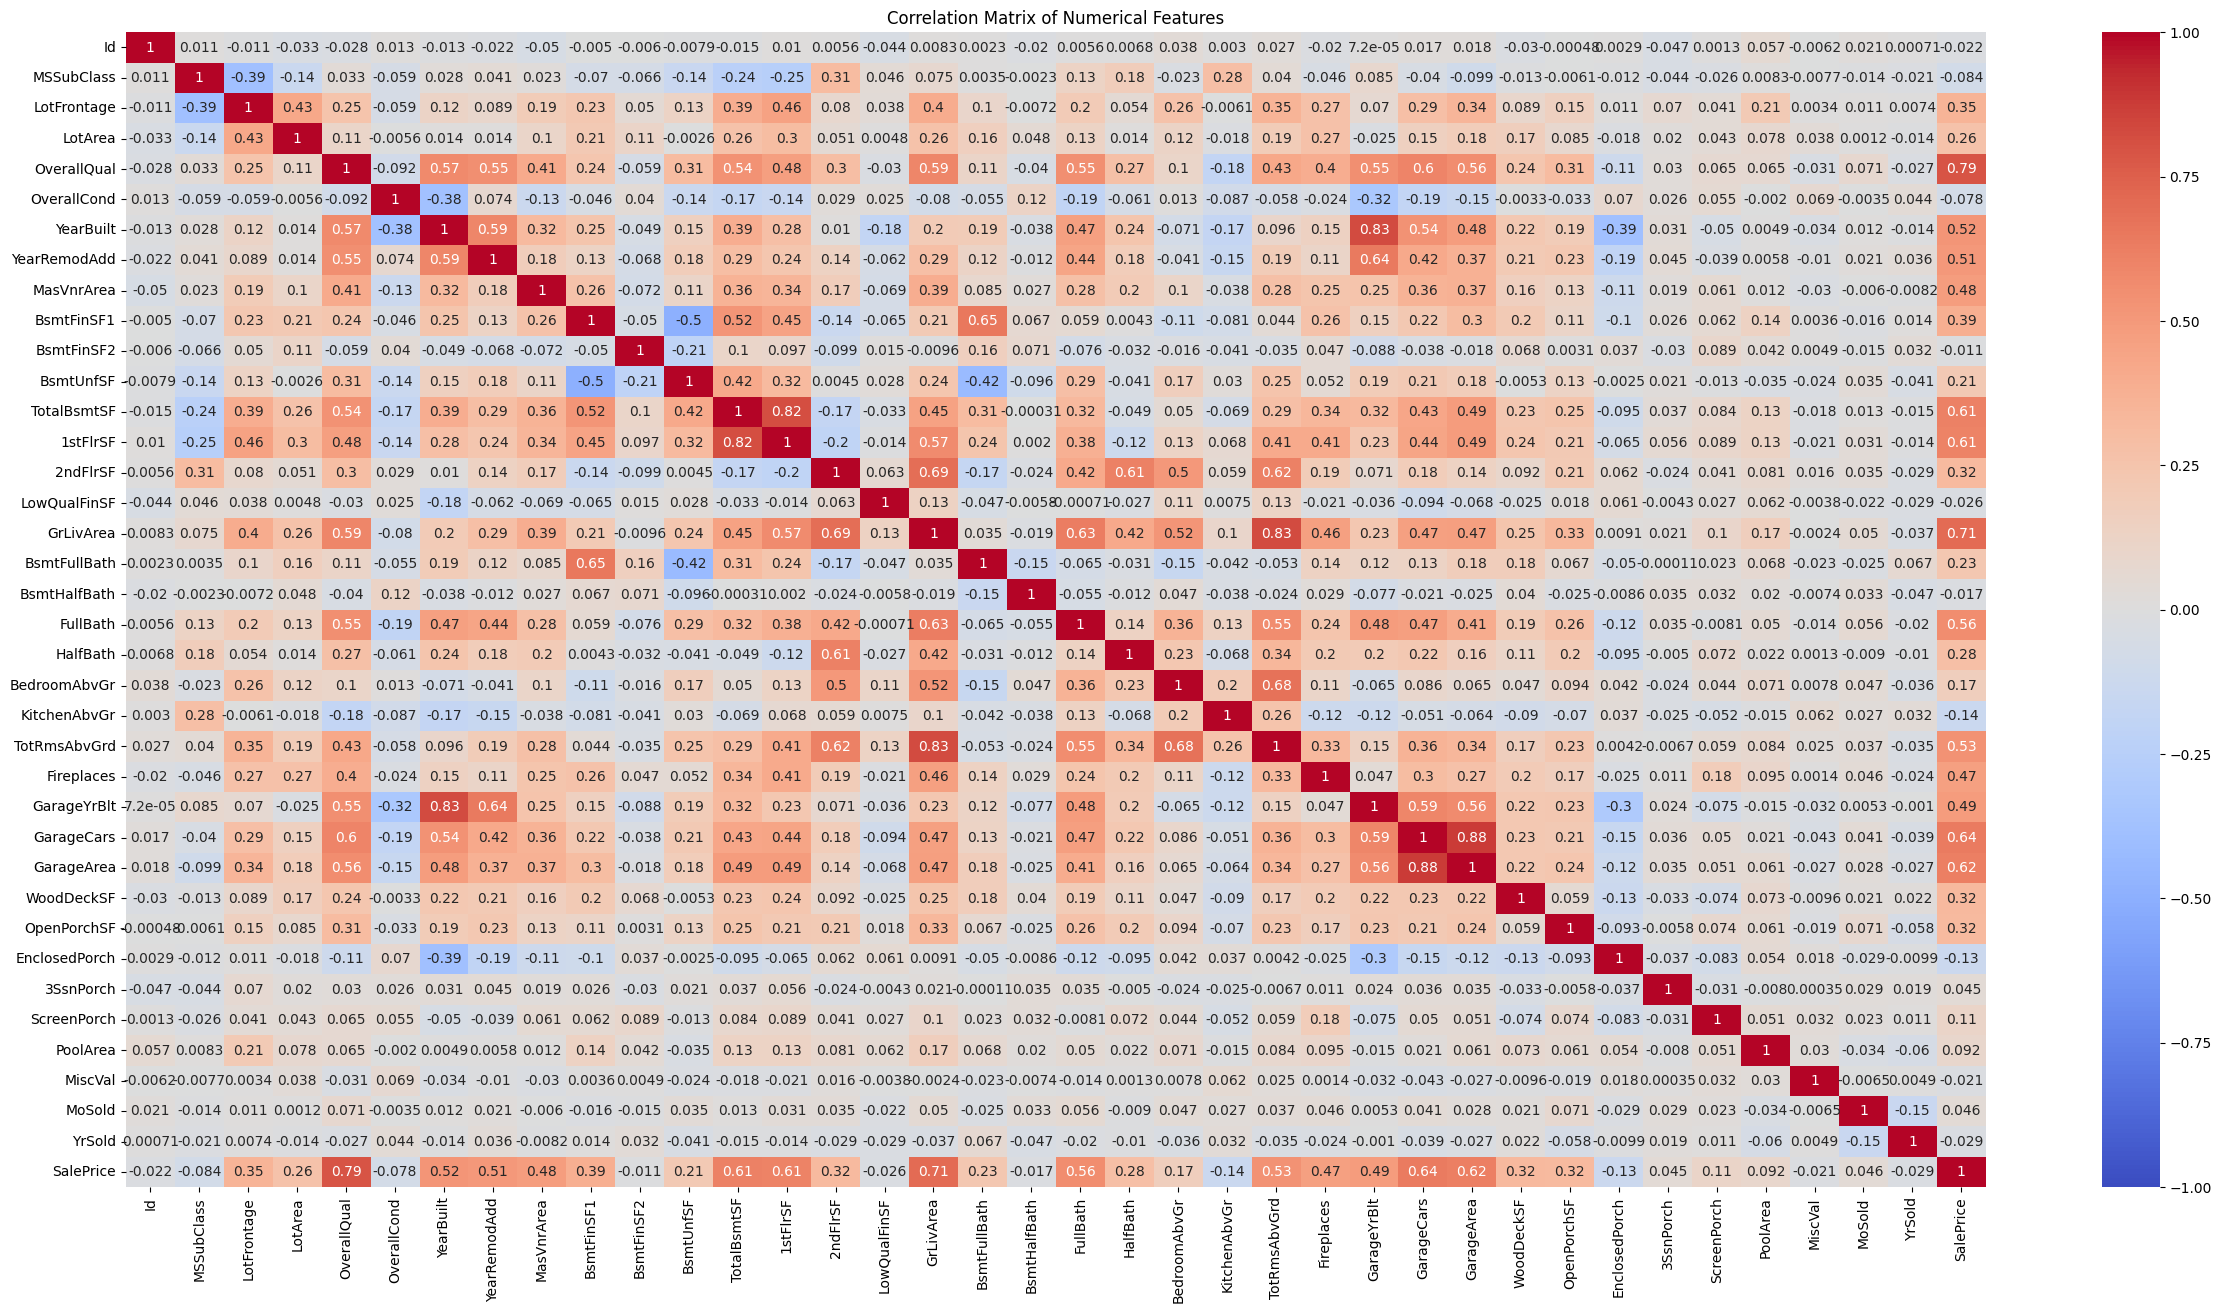

Filtered Dataset with Highly Correlated Features:
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0            7       2003          2003         706          856       856   
1            6       1976          1976         978         1262      1262   
2            7       2001          2002         486          920       920   
3            7       1915          1970         216          756       961   
4            8       2000          2000         655         1145      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   TotRmsAbvGrd  GarageYrBlt  Garage

In [6]:
correlation_matrix = numerical_features.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Filter features with correlation greater than 0.5 or less than -0.5
# Keep correlations only where the absolute value is > 0.5 (except the diagonal where correlation is 1.0)
filtered_corr = correlation_matrix[((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix != 1.0)]

# Extract the relevant features
filtered_features = filtered_corr.dropna(how='all', axis=1).dropna(how='all', axis=0).columns

# Create a new dataset with the filtered features
filtered_dataset = numerical_features[filtered_features]

# Display the filtered dataset
print("Filtered Dataset with Highly Correlated Features:")
print(filtered_dataset.head())

In [7]:
# Count the number of null values for each column in the filtered_dataset
null_counts = filtered_dataset.isnull().sum()

# Display the count of null values for each column
print("Count of Null Values for Each Column in Filtered Dataset:")
print(null_counts)


Count of Null Values for Each Column in Filtered Dataset:
OverallQual      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
GarageYrBlt     81
GarageCars       0
GarageArea       0
SalePrice        0
dtype: int64


In [8]:
# Fill NaN values with the mean of each column
filtered_dataset_filled = filtered_dataset.fillna(filtered_dataset.mean())

# Display the dataset after filling NaN values
print("Dataset after filling NaN values with mean:")
print(filtered_dataset_filled)


Dataset after filling NaN values with mean:
      OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0               7       2003          2003         706          856       856   
1               6       1976          1976         978         1262      1262   
2               7       2001          2002         486          920       920   
3               7       1915          1970         216          756       961   
4               8       2000          2000         655         1145      1145   
...           ...        ...           ...         ...          ...       ...   
1455            6       1999          2000           0          953       953   
1456            6       1978          1988         790         1542      2073   
1457            7       1941          2006         275         1152      1188   
1458            5       1950          1996          49         1078      1078   
1459            5       1965          1965         830         12

In [9]:
# Separate the SalePrice column
sale_price = filtered_dataset_filled['SalePrice']

# Select all columns except SalePrice for scaling
features = filtered_dataset_filled.drop(columns=['SalePrice'])

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the features
scaled_features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Add the SalePrice column back
scaled_data = pd.concat([scaled_features, sale_price], axis=1)

# Display the scaled data
print("Dataset after Min-Max scaling (except SalePrice):")
print(scaled_data.head())

Dataset after Min-Max scaling (except SalePrice):
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0     0.666667   0.949275      0.883333    0.125089     0.140098  0.119780   
1     0.555556   0.753623      0.433333    0.173281     0.206547  0.212942   
2     0.666667   0.934783      0.866667    0.086109     0.150573  0.134465   
3     0.666667   0.311594      0.333333    0.038271     0.123732  0.143873   
4     0.777778   0.927536      0.833333    0.116052     0.187398  0.186095   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0  0.413559   0.259231      0.333333  0.666667       0.5         0.375   
1  0.000000   0.174830      0.000000  0.666667       0.0         0.375   
2  0.419370   0.273549      0.333333  0.666667       0.5         0.375   
3  0.366102   0.260550      0.333333  0.333333       0.0         0.375   
4  0.509927   0.351168      0.333333  0.666667       0.5         0.500   

   TotRmsAbvGrd  GarageYrBlt  Garage

In [10]:
# Assuming 'categorical_features' is your DataFrame with categorical columns

# Count the number of null values for each column
null_counts = categorical_features.isnull().sum()

# Display the count of null values for each column
print("Count of Null Values for Each Column in Categorical Dataset:")
print(null_counts)

# Drop columns with more than 500 NaN values
columns_to_drop = null_counts[null_counts > 500].index
filtered_categorical_features = categorical_features.drop(columns=columns_to_drop)

# Fill remaining NaN values with the mode of each column
filled_categorical_features = filtered_categorical_features.fillna(filtered_categorical_features.mode().iloc[0])

# Display the cleaned dataset
print("Dataset after dropping columns with > 500 NaN values and filling remaining NaNs with mode:")
print(filled_categorical_features.head())


Count of Null Values for Each Column in Categorical Dataset:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition  

In [11]:
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
encoded_categorical_features = filled_categorical_features .apply(lambda col: label_encoder.fit_transform(col))

# Display the label-encoded categorical dataset
print("Label Encoded Categorical Features:")
print(encoded_categorical_features.head())

Label Encoded Categorical Features:
   MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0             5           2           2  ...           4            2   
1            24           1           2  ...           4            3   
2             5           2           2  ...           4            2   
3             6           2           2  ...           4            2   
4            15           2           2  ...           4            2   

   Functional  GarageType  GarageFinish  GarageQua

In [12]:
# Perform Chi-Square test
chi_scores, p_values = chi2(encoded_categorical_features, train_data['SalePrice'])

# Create a DataFrame to show the chi-squared score and p-values
chi_square_results = pd.DataFrame({'Feature': encoded_categorical_features.columns,
                                   'Chi-Square Score': chi_scores,
                                   'P-Value': p_values})

# Filter features with significant Chi-Square scores (e.g., p-value < 0.05)
significant_features = chi_square_results[chi_square_results['P-Value'] < 0.05]

# Display significant features based on Chi-Square test
print("Significant Categorical Features (p-value < 0.05):")
print(significant_features)

Significant Categorical Features (p-value < 0.05):
         Feature  Chi-Square Score        P-Value
2       LotShape        802.972897   1.326098e-04
6      LandSlope        889.793781   6.859676e-09
7   Neighborhood       2194.267106  3.242308e-163
10      BldgType       1951.478245  2.818820e-127
11    HouseStyle        812.887720   5.096798e-05
15   Exterior2nd        808.619925   7.736118e-05
22  BsmtFinType1        792.800700   3.368821e-04
25     HeatingQC       1483.144925   7.831579e-65
30    GarageType       1025.247371   3.954881e-18


In [13]:
len(significant_features)

9

In [14]:
# Assuming 'categorical_features' is your original DataFrame with all categorical columns

# List of significant features
significant_features = ['LotShape', 'LandSlope', 'Neighborhood', 'BldgType', 
                         'HouseStyle', 'Exterior2nd', 'BsmtFinType1', 'HeatingQC', 'GarageType']

# Create a new dataset with only the significant categorical features
significant_categorical_dataset = encoded_categorical_features[significant_features]

# Display the new dataset
print("New Dataset with Significant Categorical Features:")
print(significant_categorical_dataset.head())


New Dataset with Significant Categorical Features:
   LotShape  LandSlope  Neighborhood  BldgType  HouseStyle  Exterior2nd  \
0         3          0             5         0           5           13   
1         3          0            24         0           2            8   
2         0          0             5         0           5           13   
3         0          0             6         0           5           15   
4         0          0            15         0           5           13   

   BsmtFinType1  HeatingQC  GarageType  
0             2          0           1  
1             0          0           1  
2             2          0           1  
3             0          2           5  
4             2          0           1  


In [15]:
# Ensure both datasets have the same number of rows
if significant_categorical_dataset.shape[0] == scaled_data.shape[0]:
    # Concatenate the datasets along columns (axis=1)
    combined_dataset = pd.concat([scaled_data, significant_categorical_dataset], axis=1)
    
    # Display the combined dataset
    print("Combined Dataset with Scaled Numerical Features and Significant Categorical Features:")
    print(combined_dataset.head())
else:
    print("Error: The number of rows in 'significant_categorical_dataset' and 'scaled_data' do not match.")


Combined Dataset with Scaled Numerical Features and Significant Categorical Features:
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0     0.666667   0.949275      0.883333    0.125089     0.140098  0.119780   
1     0.555556   0.753623      0.433333    0.173281     0.206547  0.212942   
2     0.666667   0.934783      0.866667    0.086109     0.150573  0.134465   
3     0.666667   0.311594      0.333333    0.038271     0.123732  0.143873   
4     0.777778   0.927536      0.833333    0.116052     0.187398  0.186095   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  SalePrice  LotShape  \
0  0.413559   0.259231      0.333333  0.666667  ...     208500         3   
1  0.000000   0.174830      0.000000  0.666667  ...     181500         3   
2  0.419370   0.273549      0.333333  0.666667  ...     223500         0   
3  0.366102   0.260550      0.333333  0.333333  ...     140000         0   
4  0.509927   0.351168      0.333333  0.666667  ...     250000   

In [16]:
# Assuming 'combined_dataset' is your DataFrame that includes 'SalePrice'

# Separate the target variable 'SalePrice' and store it in y
y = combined_dataset['SalePrice']

# Drop the 'SalePrice' column from combined_dataset to create the feature matrix X
X = combined_dataset.drop(columns=['SalePrice'])

# Display the shapes of X and y to confirm separation
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

# Display the first few rows of X and y
print("First few rows of X (features):")
print(X.head())
print("First few rows of y (target):")
print(y.head())


Shape of X (features): (1460, 25)
Shape of y (target): (1460,)
First few rows of X (features):
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0     0.666667   0.949275      0.883333    0.125089     0.140098  0.119780   
1     0.555556   0.753623      0.433333    0.173281     0.206547  0.212942   
2     0.666667   0.934783      0.866667    0.086109     0.150573  0.134465   
3     0.666667   0.311594      0.333333    0.038271     0.123732  0.143873   
4     0.777778   0.927536      0.833333    0.116052     0.187398  0.186095   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  GarageArea  LotShape  \
0  0.413559   0.259231      0.333333  0.666667  ...    0.386460         3   
1  0.000000   0.174830      0.000000  0.666667  ...    0.324401         3   
2  0.419370   0.273549      0.333333  0.666667  ...    0.428773         0   
3  0.366102   0.260550      0.333333  0.333333  ...    0.452750         0   
4  0.509927   0.351168      0.333333  0.666667  ...

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Step 1: Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Step 3: Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Step 4: Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Step 5: Fit the model to the training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters found:", best_params)

# Step 7: Evaluate the best model on the validation set
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_val)

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error on validation data:", mse)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}
Mean Squared Error on validation data: 712123771.221369


In [18]:
# Step 1: Define the XGBoost regressor with the best hyperparameters
final_xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1.0,
    learning_rate=0.1,
    max_depth=3,
    n_estimators=300,
    subsample=1.0
)

# Step 2: Train the final model on the training data
final_xgb_model.fit(X_train, y_train)

# Step 3: Predict on the validation set
y_pred_val = final_xgb_model.predict(X_val)

# Step 4: Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error on Validation Data: {mse_val}")

# You can also compute the root mean squared error (RMSE) for better interpretability
rmse_val = mse_val ** 0.5
print(f"Root Mean Squared Error (RMSE) on Validation Data: {rmse_val}")


Mean Squared Error on Validation Data: 712123771.221369
Root Mean Squared Error (RMSE) on Validation Data: 26685.647288783704


In [19]:
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [20]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
# Step 1: Get the columns that are present in X
X_columns = X.columns

# Step 2: Filter the test_data to keep only the columns that are present in X
filtered_test_data = test_data[X_columns]

# Step 3: Display the filtered test data
print("Filtered Test Data with Only Features Present in X:")
print(filtered_test_data.head())


Filtered Test Data with Only Features Present in X:
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0            5       1961          1961       468.0        882.0       896   
1            6       1958          1958       923.0       1329.0      1329   
2            5       1997          1998       791.0        928.0       928   
3            6       1998          1998       602.0        926.0       926   
4            8       1992          1992       263.0       1280.0      1280   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  GarageArea  LotShape  \
0         0        896           0.0         1  ...       730.0       Reg   
1         0       1329           0.0         1  ...       312.0       IR1   
2       701       1629           0.0         2  ...       482.0       IR1   
3       678       1604           0.0         2  ...       470.0       IR1   
4         0       1280           0.0         2  ...       506.0       IR1   

   LandSlope  Ne

In [22]:
# Step 1: Separate numerical and categorical features
numerical_features_test = filtered_test_data.select_dtypes(include=['int64', 'float64'])
categorical_features_test = filtered_test_data.select_dtypes(include=['object'])

# Step 2: Fill null values
# Fill nulls with mean for numerical features
numerical_features_test_filled = numerical_features_test.fillna(numerical_features_test.mean())

# Fill nulls with mode for categorical features
categorical_features_test_filled = categorical_features_test.apply(lambda col: col.fillna(col.mode()[0]))

# Step 3: Apply Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_features_test_scaled = pd.DataFrame(scaler.fit_transform(numerical_features_test_filled), columns=numerical_features_test.columns)

# Step 4: Label encode the categorical features
label_encoder = LabelEncoder()
categorical_features_test_encoded = categorical_features_test_filled.apply(lambda col: label_encoder.fit_transform(col))

# Step 5: Recombine the processed numerical and categorical features into a new dataset
processed_test_data = pd.concat([numerical_features_test_scaled, categorical_features_test_encoded], axis=1)

# Step 6: Display the new dataset
print("Processed Test Data with Label Encoding for Categorical Features:")
print(processed_test_data.head())


Processed Test Data with Label Encoding for Categorical Features:
   OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
0     0.444444   0.625954      0.183333    0.116708     0.173111  0.104309   
1     0.555556   0.603053      0.133333    0.230175     0.260844  0.196672   
2     0.444444   0.900763      0.800000    0.197257     0.182139  0.111135   
3     0.555556   0.908397      0.800000    0.150125     0.181747  0.110708   
4     0.777778   0.862595      0.700000    0.065586     0.251227  0.186220   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  ...  GarageArea  LotShape  \
0  0.000000   0.104309           0.0      0.25  ...    0.490591         3   
1  0.000000   0.196672           0.0      0.25  ...    0.209677         0   
2  0.376477   0.260666           0.0      0.50  ...    0.323925         0   
3  0.364125   0.255333           0.0      0.50  ...    0.315860         0   
4  0.000000   0.186220           0.0      0.50  ...    0.340054         0   

  

In [23]:
y_pred_test = final_xgb_model.predict(processed_test_data)

In [24]:
y_pred_test[0:5]

array([132107.44, 138042.47, 192790.67, 179695.08, 203723.38],
      dtype=float32)

In [25]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': y_pred_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
